In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/pva97nk_modified.csv')
df.head()

,TARGET_B,ID,TARGET_D,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,...,DemPctVeterans,DemMedIncome,StatusCat96NK_E,StatusCat96NK_F,StatusCat96NK_L,StatusCat96NK_N,StatusCat96NK_S,DemHomeOwner_U,DemGender_M,DemGender_U
0,0,14974,NaN,2,4,1,3,17.0,13.50,9.25,...,0,0.0,0,0,0,0,0,1,0,0
1,0,6294,NaN,1,8,0,3,20.0,20.00,15.88,...,85,0.0,0,0,0,0,0,1,0,0
2,1,46110,4.0,6,41,3,20,6.0,5.17,3.73,...,36,38750.0,0,0,0,0,1,1,1,0
3,1,185937,10.0,3,12,3,8,10.0,8.67,8.50,...,27,38942.0,1,0,0,0,0,1,1,0
4,0,29637,NaN,1,1,1,1,20.0,20.00,20.00,...,37,71509.0,0,1,0,0,0,1,1,0


In [2]:
## fix missing values
## fix cluster variable

In [3]:
## # of missing values
df.isna().sum()

,0
TARGET_B,0
ID,0
TARGET_D,4843
GiftCnt36,0
GiftCntAll,0
GiftCntCard36,0
GiftCntCardAll,0
GiftAvgLast,0
GiftAvg36,0
GiftAvgAll,0


In [4]:
## fraction of missing
## look for > 50% missing to drop (delete variable)
df.isna().sum() / df.shape[0]  ## / len(df)

,0
TARGET_B,0.000000
ID,0.000000
TARGET_D,0.500000
GiftCnt36,0.000000
GiftCntAll,0.000000
GiftCntCard36,0.000000
GiftCntCardAll,0.000000
GiftAvgLast,0.000000
GiftAvg36,0.000000
GiftAvgAll,0.000000


In [5]:
missing_values = df.isna().sum() / len(df)
missing_values[missing_values > 0] ## show only vars with missing vals

,0
TARGET_D,0.500000
GiftAvgCard36,0.183770
DemAge,0.248503


In [6]:
missing_values = df.isna().sum() / len(df)
missing_values[missing_values > 0].sort_values(ascending = False) ## show only vars with missing vals

,0
TARGET_D,0.500000
DemAge,0.248503
GiftAvgCard36,0.183770


**How to create missing indicators**

Missing indicators are dummy variables (1: if missing, 0: if not missing). You would need to create missing indicators for each variable with missing values.

In [7]:
## how to create missing indicators for ALL variables
variables_with_missing =  missing_values[missing_values > 0].index + '_missing_indicator'

In [8]:
## module in sklearn
## THIS STEP IS DONE BEFORE IMPUTATION
from sklearn.impute import MissingIndicator

## instance
ind = MissingIndicator()

## .fit_transform creates the missing indicator for ALL vars with missing values
miss_ind_df = pd.DataFrame(ind.fit_transform(df).astype(int), columns = variables_with_missing)
miss_ind_df

,TARGET_D_missing_indicator,GiftAvgCard36_missing_indicator,DemAge_missing_indicator
0,1,0,1
1,1,1,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
9681,0,0,1
9682,1,0,1
9683,0,0,0
9684,1,1,1


In [9]:
## df = pd.concat([df, miss_ind_df], axis = 1)

**Imputation**

* mean imputation
* median imputation
* model imputation (RF, XGBoost, ...)
* neareast neighbors imputation

In [10]:
## impute the GiftAvgCard36 with median
df['GiftAvgCard36'].fillna(df['GiftAvgCard36'].median(), inplace = True)

In [11]:
## KNN imputation
## we can multiple variables and select the missing age of the closest neighbors
from sklearn.impute import KNNImputer

## instance
imputer = KNNImputer(n_neighbors=2)

## fit_transform fills the missing values with closest 2 neighbors
df[['DemMedIncome', 'GiftAvgAll', 'DemAge']] = pd.DataFrame(imputer.fit_transform(df[['DemMedIncome', 'GiftAvgAll', 'DemAge']]))

In [12]:
missing_values = df.isna().sum() / len(df)
missing_values[missing_values > 0] ## show only vars with missing vals

,0
TARGET_D,0.5


In [13]:
## we imputed GiftCard36 with median imputation
## we imputed the DemAge with KNN 2 neighbors
## let's get rid of TARGET_D

df.drop('TARGET_D', axis = 1, inplace = True)

In [14]:
df

,TARGET_B,ID,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,...,DemPctVeterans,DemMedIncome,StatusCat96NK_E,StatusCat96NK_F,StatusCat96NK_L,StatusCat96NK_N,StatusCat96NK_S,DemHomeOwner_U,DemGender_M,DemGender_U
0,0,14974,2,4,1,3,17.0,13.50,9.25,17.00,...,0,0.0,0,0,0,0,0,1,0,0
1,0,6294,1,8,0,3,20.0,20.00,15.88,12.50,...,85,0.0,0,0,0,0,0,1,0,0
2,1,46110,6,41,3,20,6.0,5.17,3.73,5.00,...,36,38750.0,0,0,0,0,1,1,1,0
3,1,185937,3,12,3,8,10.0,8.67,8.50,8.67,...,27,38942.0,1,0,0,0,0,1,1,0
4,0,29637,1,1,1,1,20.0,20.00,20.00,20.00,...,37,71509.0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,1,2796,2,2,2,2,10.0,15.00,15.00,15.00,...,38,45909.0,0,0,0,1,0,0,1,0
9682,0,184939,3,4,1,1,10.0,13.33,11.50,10.00,...,35,50530.0,0,0,0,0,0,0,0,1
9683,1,184974,9,14,5,7,10.0,8.78,7.71,8.80,...,32,0.0,0,0,0,0,1,0,0,0
9684,0,184994,2,7,0,1,5.0,12.50,7.43,12.50,...,32,62717.0,0,0,0,0,0,0,1,0


## **Unusual Values**

* Outliers
* Anomalies

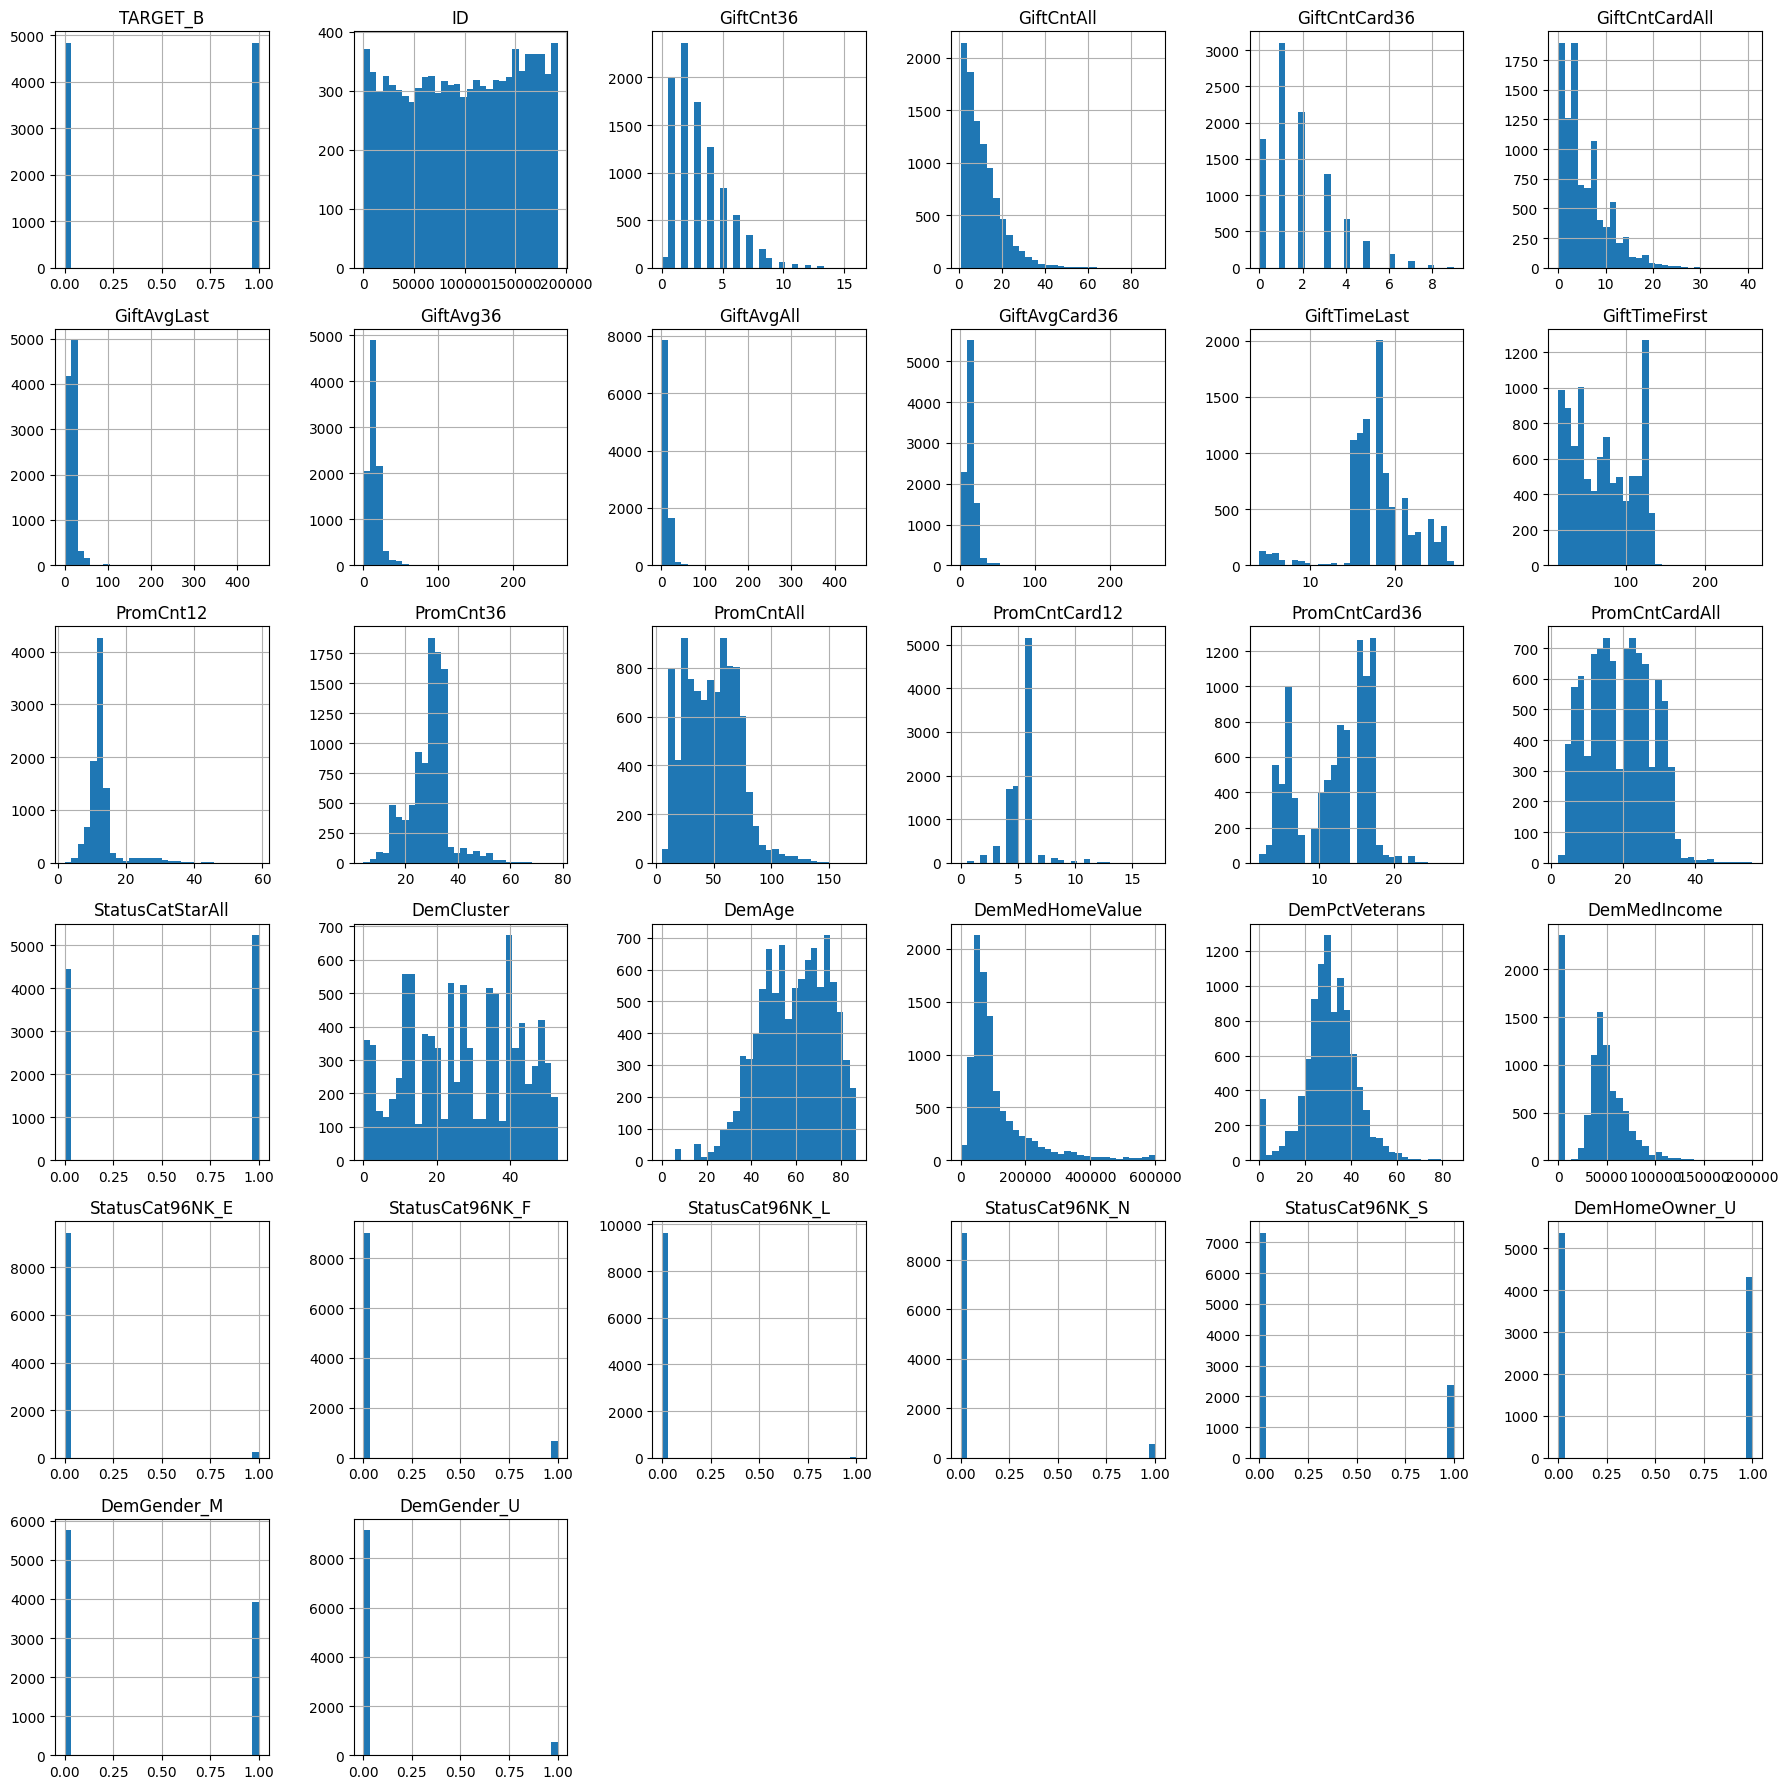

In [15]:
## graph
## histograms (increase the number of bins)
import matplotlib.pyplot as plt
df.hist(bins = 30, figsize = (18, 18))
plt.tight_layout()
plt.show()

In [16]:
## statistical summaries
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET_B,9686.0,0.500000,0.500026,0.00,0.00,0.50,1.0000,1.0
ID,9686.0,97975.474086,56550.171120,12.00,48835.50,99106.00,148538.7500,191779.0
GiftCnt36,9686.0,3.205451,2.133421,0.00,2.00,3.00,4.0000,16.0
GiftCntAll,9686.0,10.507640,8.993401,1.00,4.00,8.00,15.0000,91.0
GiftCntCard36,9686.0,1.856597,1.595419,0.00,1.00,1.00,3.0000,9.0
GiftCntCardAll,9686.0,5.582490,4.736894,0.00,2.00,4.00,8.0000,41.0
GiftAvgLast,9686.0,16.017739,12.041805,0.00,10.00,15.00,20.0000,450.0
GiftAvg36,9686.0,14.876203,10.057007,0.00,9.60,13.50,18.5000,260.0
GiftAvgAll,9686.0,12.489325,9.209297,1.50,7.75,10.71,15.0000,450.0
GiftAvgCard36,9686.0,13.907531,9.079554,1.33,10.00,12.50,15.3825,260.0


In [17]:
## if there is data integrity set it to missing and then impute
## e.g, DemAge = 140, set DemAge = np.NaN and then impute
## fix DemMedHomeValue and DemMedIncome if zero set them to missing

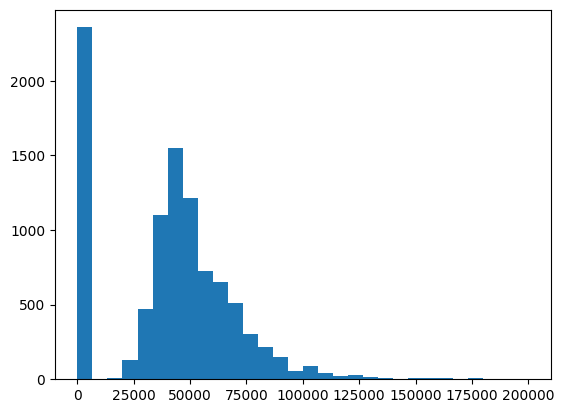

In [19]:
## DemMedIncome
plt.hist(df['DemMedIncome'], bins = 30)
plt.show()

In [21]:
## 2300 donors with 0 income
## it might be that the donor did NOT want to input the income
## let's set it to missing and impute with median
df[df.DemMedIncome == 0].shape

(2357, 32)

In [22]:
## before imputation check if you want to create missing indicators
## income_missing = {1,0}

## set the values to missing
df['DemMedIncome'].replace(0, np.NaN, inplace = True)

In [23]:
missing_values = df.isna().sum() / len(df)
missing_values[missing_values > 0]

,0
DemMedIncome,0.243341


In [24]:
## create the missing indicator
from sklearn.impute import MissingIndicator

## instance
ind = MissingIndicator()

## .fit_transform creates the missing indicator for ALL vars with missing values
miss_ind_df2 = pd.DataFrame(ind.fit_transform(df).astype(int), columns = ['DemMedIncome_missing_indicator'])
miss_ind_df2

,DemMedIncome_missing_indicator
0,1
1,1
2,0
3,0
4,0
...,...
9681,0
9682,0
9683,1
9684,0


In [25]:
## make imputation for income
df['DemMedIncome'].fillna(df.DemMedIncome.median(), inplace = True)

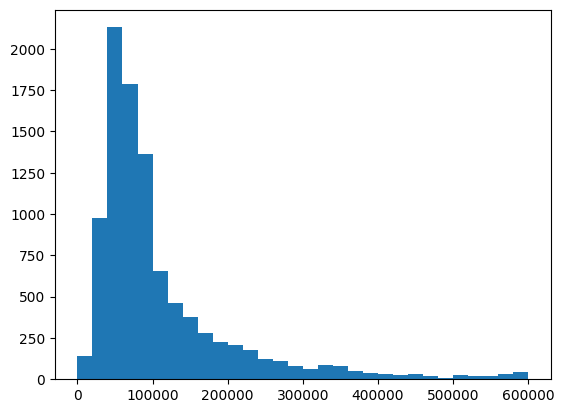

In [26]:
plt.hist(df.DemMedHomeValue, bins = 30);

## **Other ways to check for anomalies and unusual values**

* Compare the 75% percentile to the maximum
* Compare the 25% percentile to the minimum
* We can use models that detect anomalies (IsolationForest)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET_B,9686.0,0.500000,0.500026,0.00,0.00,0.50,1.0000,1.0
ID,9686.0,97975.474086,56550.171120,12.00,48835.50,99106.00,148538.7500,191779.0
GiftCnt36,9686.0,3.205451,2.133421,0.00,2.00,3.00,4.0000,16.0
GiftCntAll,9686.0,10.507640,8.993401,1.00,4.00,8.00,15.0000,91.0
GiftCntCard36,9686.0,1.856597,1.595419,0.00,1.00,1.00,3.0000,9.0
GiftCntCardAll,9686.0,5.582490,4.736894,0.00,2.00,4.00,8.0000,41.0
GiftAvgLast,9686.0,16.017739,12.041805,0.00,10.00,15.00,20.0000,450.0
GiftAvg36,9686.0,14.876203,10.057007,0.00,9.60,13.50,18.5000,260.0
GiftAvgAll,9686.0,12.489325,9.209297,1.50,7.75,10.71,15.0000,450.0
GiftAvgCard36,9686.0,13.907531,9.079554,1.33,10.00,12.50,15.3825,260.0


In [29]:
## subsetting
## drop this obs customer number 7389 (ID)
df[(df.GiftAvgAll > 250) & (df.GiftAvgLast > 250)]

,TARGET_B,ID,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,...,DemPctVeterans,DemMedIncome,StatusCat96NK_E,StatusCat96NK_F,StatusCat96NK_L,StatusCat96NK_N,StatusCat96NK_S,DemHomeOwner_U,DemGender_M,DemGender_U
7389,1,12370,0,1,0,0,450.0,0.0,450.0,12.5,...,24,65740.0,0,0,0,1,0,0,0,0


In [30]:
## drop this obs as well
df[df.GiftAvgCard36 > 250]

,TARGET_B,ID,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,...,DemPctVeterans,DemMedIncome,StatusCat96NK_E,StatusCat96NK_F,StatusCat96NK_L,StatusCat96NK_N,StatusCat96NK_S,DemHomeOwner_U,DemGender_M,DemGender_U
1378,0,185153,2,4,2,2,25.0,260.0,138.75,260.0,...,0,48699.0,0,0,0,0,0,1,0,0


In [31]:
## drop this obs as well
df[df.GiftAvgLast > 250]

,TARGET_B,ID,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,...,DemPctVeterans,DemMedIncome,StatusCat96NK_E,StatusCat96NK_F,StatusCat96NK_L,StatusCat96NK_N,StatusCat96NK_S,DemHomeOwner_U,DemGender_M,DemGender_U
7389,1,12370,0,1,0,0,450.0,0.0,450.00,12.5,...,24,65740.0,0,0,0,1,0,0,0,0
7933,1,185080,2,14,0,4,300.0,150.0,98.79,12.5,...,50,48699.0,0,0,0,0,0,1,0,0


In [32]:
## DROP DONORS WITH IDS 7389 1378 7933
df.drop([7389, 1378, 7933 ], axis = 0, inplace = True)

## **Transformations**

Check for skewness.

* histogram
* skewness metric

In [33]:
## -1 to 1 fairly symmetric
## > 1 skewed right
## < 1 skewed left
## consider transformations for float-type variables ($ amount)
df.select_dtypes('number').skew()

,0
TARGET_B,0.000207
ID,-0.057578
GiftCnt36,1.288303
GiftCntAll,1.863061
GiftCntCard36,1.172397
GiftCntCardAll,1.331089
GiftAvgLast,5.152164
GiftAvg36,4.412160
GiftAvgAll,4.850258
GiftAvgCard36,5.287930


In [34]:
## transform ALL THE GIFT VARIABLES
## makes a list of variables that start with "Gift"
gift_columns = [col for col in df if col.startswith('Gift')]
gift_columns

['GiftCnt36',
 'GiftCntAll',
 'GiftCntCard36',
 'GiftCntCardAll',
 'GiftAvgLast',
 'GiftAvg36',
 'GiftAvgAll',
 'GiftAvgCard36',
 'GiftTimeLast',
 'GiftTimeFirst']

In [35]:
## create a list adding "Log_" at the beginning of each variable
log_gift_columns = []

for item in gift_columns:
  log_gift_columns.append('Log_' + str(item))

log_gift_columns

['Log_GiftCnt36',
 'Log_GiftCntAll',
 'Log_GiftCntCard36',
 'Log_GiftCntCardAll',
 'Log_GiftAvgLast',
 'Log_GiftAvg36',
 'Log_GiftAvgAll',
 'Log_GiftAvgCard36',
 'Log_GiftTimeLast',
 'Log_GiftTimeFirst']

In [42]:
## add a small value to variable to avoid missing values (-inf)
df[log_gift_columns] = np.log(df[gift_columns] + 0.1)

In [44]:
## now drop the original variables
df.drop(gift_columns, axis = 1, inplace = True)

In [45]:
## drop ID
df.drop('ID', axis = 1, inplace = True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9683 entries, 0 to 9685
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TARGET_B            9683 non-null   int64  
 1   PromCnt12           9683 non-null   int64  
 2   PromCnt36           9683 non-null   int64  
 3   PromCntAll          9683 non-null   int64  
 4   PromCntCard12       9683 non-null   int64  
 5   PromCntCard36       9683 non-null   int64  
 6   PromCntCardAll      9683 non-null   int64  
 7   StatusCatStarAll    9683 non-null   int64  
 8   DemCluster          9683 non-null   int64  
 9   DemAge              9683 non-null   float64
 10  DemMedHomeValue     9683 non-null   float64
 11  DemPctVeterans      9683 non-null   int64  
 12  DemMedIncome        9683 non-null   float64
 13  StatusCat96NK_E     9683 non-null   int64  
 14  StatusCat96NK_F     9683 non-null   int64  
 15  StatusCat96NK_L     9683 non-null   int64  
 16  StatusCat96

## **Dimension Reduction**

For categorical variables keeping only the levels with most observations can help reduce dims.

In [47]:
## DemCluster
## 54 levels (53 model df)
df.DemCluster.nunique()

54

In [48]:
## create a copy of the data set
df1 = df.copy()

In [49]:
## what are the most common levels?
## how many levels to keep (arbitrarily)
df1.DemCluster.value_counts()

,count
DemCluster,
40,432
36,401
24,400
35,384
27,331
12,323
49,323
18,321
13,309


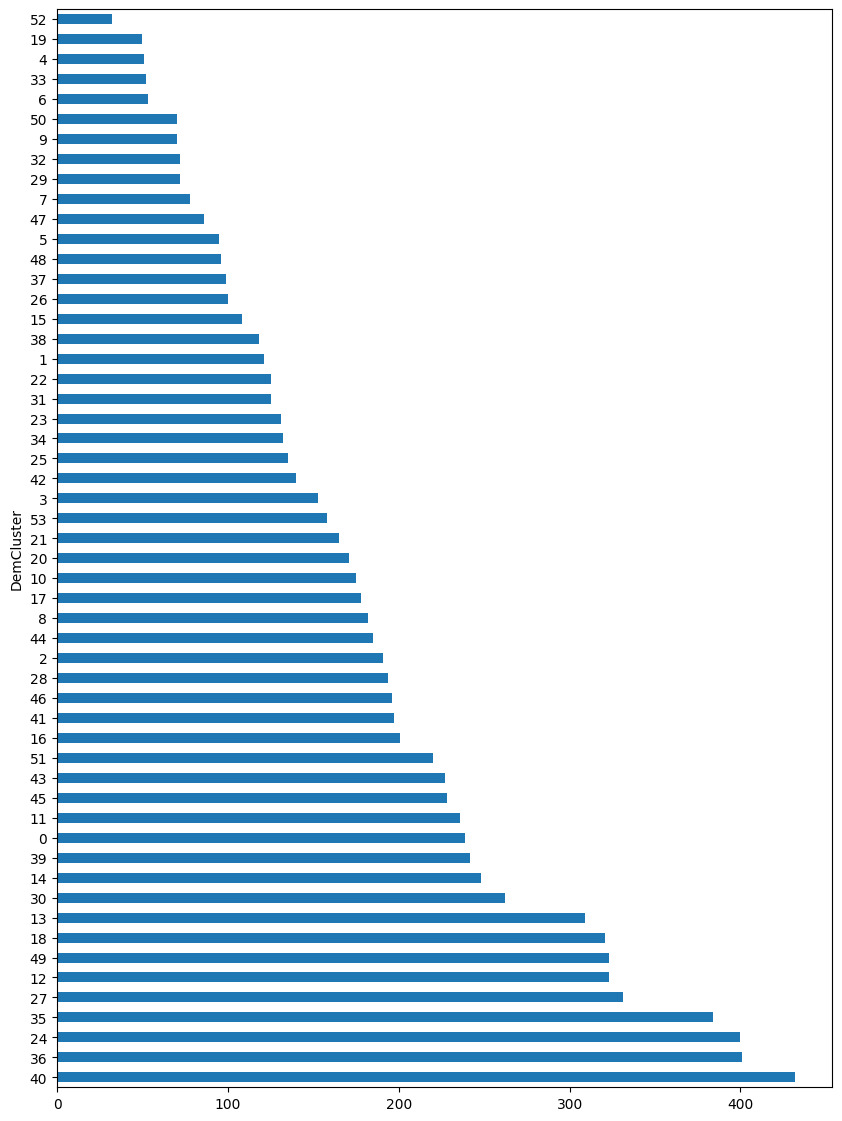

In [50]:
## if not sure get a barchart
df1.DemCluster.value_counts().plot.barh(figsize = (10,14));

In [51]:
## let's keep only the top 4
## create dummy variables for 4 top levels
## the rest are considered the "OTHER" category (ref)
df1['DemCluster_40'] = (df['DemCluster'] == 40).astype('int')
df1['DemCluster_36'] = (df['DemCluster'] == 36).astype('int')
df1['DemCluster_24'] = (df['DemCluster'] == 24).astype('int')
df1['DemCluster_35'] = (df['DemCluster'] == 35).astype('int')

In [53]:
## drop the original DemCluster
df1.drop('DemCluster', axis = 1, inplace = True)

In [54]:
## we decreased the number of dummy-encoded variables from 53 to 4
## DRAWBACK: maybe those 4 most common levels have no predictive power
df1.head()

,TARGET_B,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,DemAge,DemMedHomeValue,...,Log_GiftAvgLast,Log_GiftAvg36,Log_GiftAvgAll,Log_GiftAvgCard36,Log_GiftTimeLast,Log_GiftTimeFirst,DemCluster_40,DemCluster_36,DemCluster_24,DemCluster_35
0,0,8,17,26,3,8,13,0,72.0,0.0,...,2.839078,2.610070,2.235376,2.839078,3.049273,4.191169,0,0,0,0
1,0,14,35,79,5,5,24,0,67.0,186800.0,...,3.000720,3.000720,2.771338,2.533697,3.261935,4.522875,0,0,0,0
2,1,12,23,51,5,11,22,1,53.5,87600.0,...,1.808289,1.662030,1.342865,1.629241,2.895912,4.710431,0,0,0,0
3,1,14,22,44,2,6,16,1,54.5,139200.0,...,2.312535,2.171337,2.151762,2.171337,2.208274,4.533674,0,0,0,0
4,0,10,15,13,4,7,6,0,53.0,168100.0,...,3.000720,3.000720,3.000720,3.000720,3.049273,3.049273,0,0,0,1
